In [1]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Preprocess the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:
# Flatten the input images
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

In [5]:
# Convert the labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [6]:
# Split the training data into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [7]:
# Define the model architecture
model_sgd = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(784,)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model_momentum = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(784,)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model_adagrad = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(784,)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model_adam = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(784,)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
# Define the optimizers
sgd = tf.keras.optimizers.SGD(learning_rate=0.001)
momentum = tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)
adagrad = tf.keras.optimizers.Adagrad(learning_rate=0.001)
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

In [9]:
# Compile the model with a categorical cross-entropy loss function
model_adagrad.compile(optimizer=adagrad,loss=tf.keras.losses.Hinge(),metrics=['accuracy'])
model_adam.compile(optimizer=adam,loss=tf.keras.losses.Hinge(), metrics=['accuracy'])
model_momentum.compile(optimizer=momentum,loss=tf.keras.losses.Hinge(),metrics=['accuracy'])
model_sgd.compile(optimizer=sgd,loss=tf.keras.losses.Hinge(), metrics=['accuracy'])

In [10]:
# Train the model with mini-batch gradient descent
history_adam = model_adam.fit(X_train, y_train, batch_size=64, epochs=100, verbose= True, validation_data=(X_val, y_val))
history_adagrad= model_adagrad.fit(X_train, y_train, batch_size=64, epochs=100, verbose= True, validation_data=(X_val, y_val))
history_momentum = model_momentum.fit(X_train, y_train, batch_size=64, epochs=100, verbose= True, validation_data=(X_val, y_val))
history_sgd = model_sgd.fit(X_train, y_train, batch_size=64, epochs=100, verbose= True, validation_data=(X_val, y_val))

Epoch 1/100
750/750 [==============================] - 2s 2ms/step - loss: 0.9431 - accuracy: 0.8090 - val_loss: 0.9312 - val_accuracy: 0.8524
Epoch 2/100
750/750 [==============================] - 2s 2ms/step - loss: 0.9291 - accuracy: 0.8601 - val_loss: 0.9287 - val_accuracy: 0.8602
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 0.9270 - accuracy: 0.8688 - val_loss: 0.9280 - val_accuracy: 0.8624
Epoch 4/100
750/750 [==============================] - 1s 2ms/step - loss: 0.9131 - accuracy: 0.9393 - val_loss: 0.9114 - val_accuracy: 0.9448
Epoch 5/100
750/750 [==============================] - 1s 2ms/step - loss: 0.9096 - accuracy: 0.9554 - val_loss: 0.9098 - val_accuracy: 0.9544
Epoch 6/100
750/750 [==============================] - 1s 2ms/step - loss: 0.9082 - accuracy: 0.9620 - val_loss: 0.9091 - val_accuracy: 0.9578
Epoch 7/100
750/750 [==============================] - 2s 3ms/step - loss: 0.9072 - accuracy: 0.9667 - val_loss: 0.9084 - val_accuracy: 0.9603

In [11]:
# Extract the training history
loss_adagrad = history_adagrad.history['loss']
val_loss_adagrad = history_adagrad.history['val_loss']

loss_momentum = history_momentum.history['loss']
val_loss_momentum = history_momentum.history['val_loss']

loss_adam = history_adam.history['loss']
val_loss_adam = history_adam.history['val_loss']

loss_sgd = history_sgd.history['loss']
val_loss_sgd = history_sgd.history['val_loss']


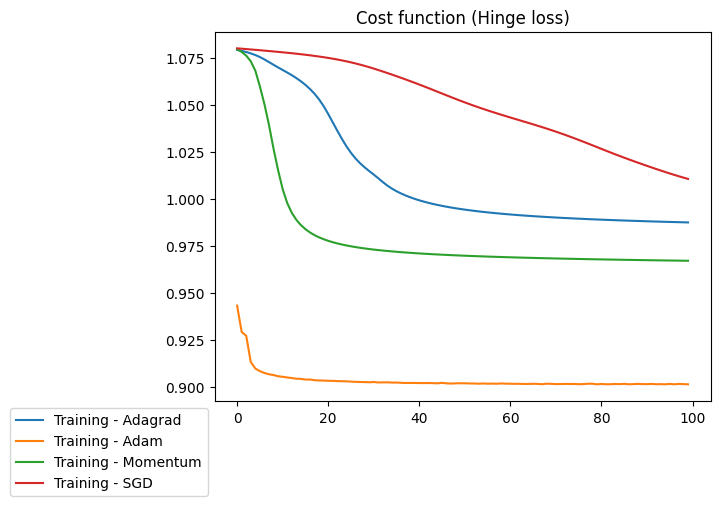

In [12]:
# Plot the training history
sns.lineplot(x=range(len(loss_adagrad)), y=loss_adagrad, label='Training - Adagrad')

sns.lineplot(x=range(len(loss_adam)), y=loss_adam, label='Training - Adam')

sns.lineplot(x=range(len(loss_momentum)), y=loss_momentum, label='Training - Momentum')

sns.lineplot(x=range(len(loss_sgd)), y=loss_sgd, label='Training - SGD')

plt.legend(bbox_to_anchor =(0, 0))

plt.title('Cost function (Hinge loss)')

plt.show()

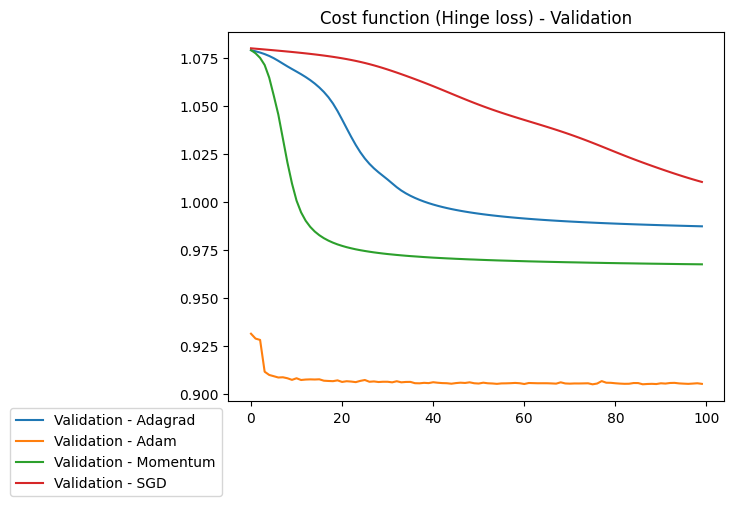

In [13]:
# Plot the training history
sns.lineplot(x=range(len(val_loss_adagrad)), y=val_loss_adagrad, label='Validation - Adagrad')

sns.lineplot(x=range(len(val_loss_adam)), y=val_loss_adam, label='Validation - Adam')

sns.lineplot(x=range(len(val_loss_momentum)), y=val_loss_momentum, label='Validation - Momentum')

sns.lineplot(x=range(len(val_loss_sgd)), y=val_loss_sgd, label='Validation - SGD')

plt.legend(bbox_to_anchor =(0, 0))

plt.title('Cost function (Hinge loss) - Validation')

plt.show()

In [14]:
# Extract the training history
acc_adagrad = history_adagrad.history['accuracy']
val_acc_adagrad = history_adagrad.history['val_accuracy']

acc_momentum = history_momentum.history['accuracy']
val_acc_momentum = history_momentum.history['val_accuracy']

acc_adam = history_adam.history['accuracy']
val_acc_adam = history_adam.history['val_accuracy']

acc_sgd = history_sgd.history['accuracy']
val_acc_sgd = history_sgd.history['val_accuracy']

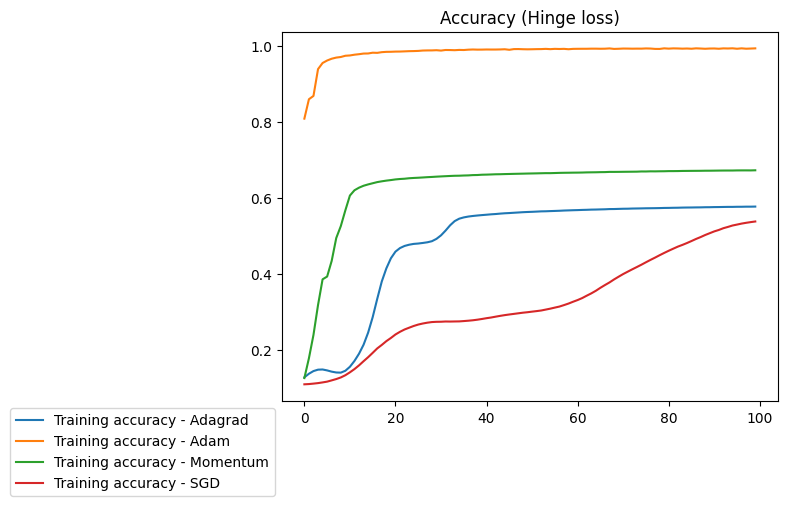

In [15]:
# Plot the training history
sns.lineplot(x=range(len(acc_adagrad)), y=acc_adagrad, label='Training accuracy - Adagrad')

sns.lineplot(x=range(len(acc_adam)), y=acc_adam, label='Training accuracy - Adam')

sns.lineplot(x=range(len(acc_momentum)), y=acc_momentum, label='Training accuracy - Momentum')

sns.lineplot(x=range(len(acc_sgd)), y=acc_sgd, label='Training accuracy - SGD')

plt.legend(bbox_to_anchor =(0, 0))

plt.title('Accuracy (Hinge loss)')

plt.show()

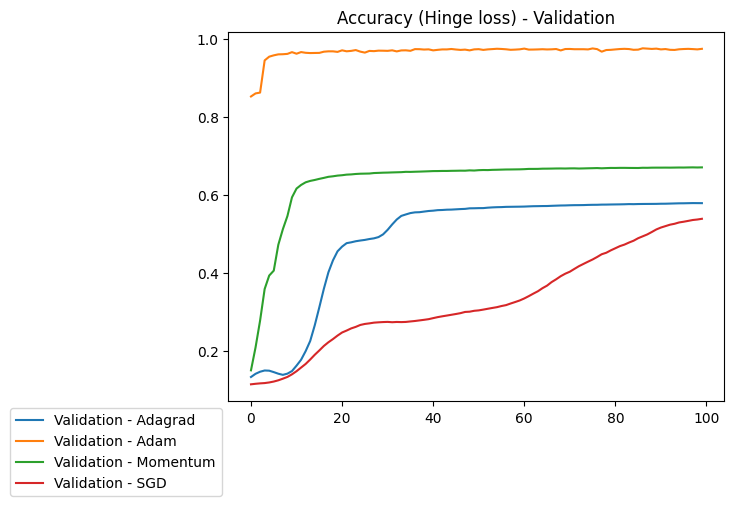

In [16]:
# Plot the training history
sns.lineplot(x=range(len(val_acc_adagrad)), y=val_acc_adagrad, label='Validation - Adagrad')

sns.lineplot(x=range(len(val_acc_adam)), y=val_acc_adam, label='Validation - Adam')

sns.lineplot(x=range(len(val_acc_momentum)), y=val_acc_momentum, label='Validation - Momentum')

sns.lineplot(x=range(len(val_acc_sgd)), y=val_acc_sgd, label='Validation - SGD')

plt.legend(bbox_to_anchor =(0, 0))

plt.title('Accuracy (Hinge loss) - Validation')

plt.show()



In [17]:
def describe_optimizer_performance(histories):
    # Find the optimizer with the highest validation accuracy
    best_optimizer = max(histories, key=lambda x: max(histories[x]['val_accuracy']))
    best_val_accuracy = max(histories[best_optimizer]['val_accuracy'])

    # Generate textual summary
    summary = f"The optimizer with the highest validation accuracy is {best_optimizer}, with an accuracy of {best_val_accuracy * 100:.2f}%.\n\n"
    summary += "Training accuracy at the last epoch for each optimizer:\n"

    for opt in histories:
        last_epoch = len(histories[opt]['accuracy'])
        train_accuracy = histories[opt]['accuracy'][-1]
        val_accuracy = histories[opt]['val_accuracy'][-1]
        summary += f"{opt}: Training accuracy = {train_accuracy * 100:.2f}%, Validation accuracy = {val_accuracy * 100:.2f}% (Epoch {last_epoch})\n"

    return summary

histories = {
    'Adagrad': history_adagrad.history,
    'Adam': history_adam.history,
    'Momentum': history_momentum.history,
    'SGD': history_sgd.history
}

result_summary = describe_optimizer_performance(histories)
print(result_summary)


The optimizer with the highest validation accuracy is Adam, with an accuracy of 97.58%.

Training accuracy at the last epoch for each optimizer:
Adagrad: Training accuracy = 57.77%, Validation accuracy = 57.91% (Epoch 100)
Adam: Training accuracy = 99.39%, Validation accuracy = 97.45% (Epoch 100)
Momentum: Training accuracy = 67.31%, Validation accuracy = 67.08% (Epoch 100)
SGD: Training accuracy = 53.85%, Validation accuracy = 53.90% (Epoch 100)

